# ASSIGNMENT 2
## Submission Deadline: 03/11/21, 2100 Hrs
## Submission Link: [https://forms.gle/wnUyJjhhbcFKdTGX8](https://forms.gle/wnUyJjhhbcFKdTGX8)

Name: **PRAKHAR PANDEY**

Roll No.: **180527**

IITK EMail: **prkpndy@iitk.ac.in**

**Read all the instructions below carefully before you start working on the assignment.**
- The purpose of this course is that you learn RL and the best way to do that is by implementation and experimentation.
- The assignment requires your to implement some algorithms and you are required report your findings after experimenting with those algorithms.
- **You are required to submit ZIP file containing a Jupyter notebook (.ipynb), an image folder, and Env folder. The notebook would include the code, graphs/plots of the experiments you run and your findings/observations. Env folder is the environment implementation provided by us (DO NOT change it) and image folder is the folder having plots, images, etc.**
- In case you use any maths in your explanations, render it using latex in the Jupyter notebook.
- You are expected to implement algorithms on your own and not copy it from other sources/class mates. Of course, you can refer to lecture slides.
- If you use any reference or material (including code), please cite the source, else it will be considered plagiarism. But referring to other sources that directly solve the problems given in the assignment is not allowed. There is a limit to which you can refer to outside material.
- This is an individual assignment.
- In case your solution is found to have an overlap with solution by someone else (including external sources), all the parties involved will get zero in this and all future assignments plus further more penalties in the overall grade. We will check not just for lexical but also semantic overlap. Same applies for the code as well. Even an iota of cheating would NOT be tolerated. If you cheat one line or cheat one page the penalty would be same.
- Be a smart agent, think long term, if you cheat we will discover it somehow, the price you would be paying is not worth it.
- In case you are struggling with the assignment, seek help from TAs. Cheating is not an option! I respect honesty and would be lenient if you are not able to solve some questions due to difficulty in understanding. Remember we are there to help you out, seek help if something is difficult to understand.
- The deadline for the submission is given above. Submit at least 30 minutes before the deadline, lot can happen at the last moment, your internet can fail, there can be a power failure, you can be abducted by aliens, etc.
- You have to submit your assignment via following Google Form (link above)
- The form would close after the deadline and we will not accept any solution. No reason what-so-ever would be accepted for not being able to submit before the deadline.
- Since the assignment involves experimentation, reporting your results and observations, there is a lot of scope for creativity and innovation and presenting new perspectives. Such efforts would be highly appreciated and accordingly well rewarded. Be an exploratory agent!
- Your code should be very well documented, there are marks for that.
- In your plots, have a clear legend and clear lines, etc. Of course you would generating the plots in your code but you must also put these plots in your notebook. Generate high resolution pdf/svg version of the plots so that it doesn't pixilate on zooming.
- For all experiments, report about the seed used in the code documentation, write about the seed used.
- In your notebook write about all things that are not obvious from the code e.g., if you have made any assumptions, references/sources, running time, etc.
- **DO NOT Forget to write name, roll no and email details above**
- For each of the sub-part in the question create a new cell below the question and put your answer in there. This includes the plots as well

# Random Maze Environment

<b><center>Maze Environment</center></b> | <b><center>Maze Environment Transitions</center></b>
--- | ---
<img src="image/maze_env.png" style="height:300px"> | <img src="image/maze_env_transitions.png" style="height:300px">

In this assignment we will be exploring a variant of the Random Maze Environment (RME) that we have been looking in the lectures. The environment is represented as a grid world in Figure 1a. Random maze environment is a highly stochastic environment with 11 states: two terminal states (a goal state (G) and a hole state (H)) and 9 non-terminal states and a wall in between the environment. The wall behaves similar to the wall on the periphery of the environment, basically if an agent bumps against the wall, it bounces back. The boundary of the environment behaves similarly, if an agent hits the boundary it bounces back. The agent receives a reward of +1 when it lands in the goal state (3) and it receives a reward of -1 when it lands in the hole state (7). For rest of the transitions there is a reward of -0.04. Essentially the agent has the living cost of -0.04. The transitions are stochastic as shown in Figure 1b. In this environment, four actions are possible: left, top, right, and bottom. For every intended action, there is 80% chance of going in the intended direction and remaining 20% chances of going in either of the orthogonal directions. The 20% chance gets equally distributed between each of the orthogonal direction. The agent starts from state 8 (S). Assume γ = 0.99 for the problems below.

In this assignment we will be looking at control algorithms we learnt in Lecture 10 and 11. For each of the plot, create the legend on the left/right side so that it doesn't overlay on the plot. For all the algorithms below, this time we will not be specifying the hyper-parameters, please play with the hyper-params to come up with the best values. This way you will learn to tune the model. As you are aware from your past experience, single run of the algorithm over the environment results in plots that have lot of variance and look very noisy. One way to overcome this is to create several different instances of the environment using different seeds and then average out the results across these and plot these. For all the plots below, you this strategy.

In [ ]:
# Environment setup
!pip install --editable Environments

### <span style="color:red">Restart the kernel.</span>

In [1]:
# all imports go in here
import gym
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
# Create environment
env = gym.make('environments:random_maze-v0')

The environment can be interacted with via standard functions, reset() and step(). The environment uses the following structure.

#### States: 
        0        1        2         3(Goal)
        4        5(Wall)  6         7(Hole)
        8(Start) 9        10        11
#### Action space:
        0 -> LEFT
        1 -> UP
        2 -> RIGHT
        3 -> DOWN
#### Rewards:
        If Goal state: +1
        If Hole state: -1
        Otherwise: -0.04
#### Step() returns:
        state,       reward,            is_Terminal                               info
        Next state   Reward received    Whether next state is a terminal state    Info dictionary (Empty)

### All your hyperparameters should be defined here. We will change their value here and your code should work  accordingly.

In [4]:
# mention the values of all the hyperparameters to be used in the entire notebook
max_steps = 100
num_episodes = 5000

# hyperparameters for FVMCC
gamma_fvmcc = 0.99
alpha_fvmcc = 0.5
epsilon_fvmcc = 0.99

# hyperparameters for SARSA
gamma_sarsa = 0.96
alpha_sarsa = 0.6
epsilon_sarsa = 0.99

# hyperparameters for Q-Learning
gamma_q_learning = 0.98
alpha_q_learning = 0.6
epsilon_q_learning = 0.99

# hyperparameters for Double Q-Learning
gamma_double_q_learning = 0.95
alpha_double_q_learning = 0.5
epsilon_double_q_learning = 0.99

# hyperparameters for SARSA-lambda (Replacing)
gamma_sarsa_lambda_replacing = 0.98
alpha_sarsa_lambda_replacing = 0.65
epsilon_sarsa_lambda_replacing = 0.99
lambda_sarsa_lambda_replacing = 0.5

# hyperparameters for SARSA-lambda (Accumulating)
gamma_sarsa_lambda_accumulating = 0.98
alpha_sarsa_lambda_accumulating = 0.65
epsilon_sarsa_lambda_accumulating = 0.99
lambda_sarsa_lambda_accumulating = 0.5

# hyperparameters for Q-lambda (Replacing)
gamma_q_lambda_replacing = 0.95
alpha_q_lambda_replacing = 0.5
epsilon_q_lambda_replacing = 0.99
lambda_q_lambda_replacing = 0.55

# hyperparameters for Q-lambda (Accumulating)
gamma_q_lambda_accumulating = 0.95
alpha_q_lambda_accumulating = 0.5
epsilon_q_lambda_accumulating = 0.99
lambda_q_lambda_accumulating = 0.55

# hyperparameters for Dyna-Q
gamma_dyna_q = 0.98
alpha_dyna_q = 0.7
epsilon_dyna_q = 0.99
num_planning_dyna_q = 5

# hyperparameters for Trajector Learning
gamma_trajectory_sampling = 0.99
alpha_trajectory_sampling = 0.5
epsilon_trajectory_sampling = 0.99
max_trajectory_trajectory_sampling = 5

### Environment Variables

In [5]:
num_actions = 4
num_states = 12
starting_state = 8
goal_state = 3
hole_state = 7

### Other global variables

In [6]:
num_envs = 10
psr_gap = 50

###  Dictionary to store the Policy Success Rate

In [7]:
psr = {}

### Function to plot the graphs

In [19]:
# function to plot graph for given state-value and Q-value function vs Epsisodes
def plot(state_value, q_value, policy_success_rate):
    curves = plt.plot(state_value)
    plt.legend(curves, [f'State {s}' for s in range(num_states)])
    plt.title('Plot showing evolution of state-value function with time')
    plt.xlabel('Episodes')
    plt.ylabel('State-value')
    plt.show()
    
    linestyles = ['-', '--', '-.', ':']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    legends = []
    
    for s in range(num_states):
        for a in range(num_actions):
            plt.plot(q_value[:, s, a], color=colors[s%len(colors)], ls=linestyles[a%len(linestyles)], label=f'State {s}, Action {a}')
    plt.legend(loc='upper left')
    plt.title('Plot showing evolution of Q function with time')
    plt.xlabel('Episodes')
    plt.ylabel('State-action value')
    plt.show()
    
    curves = plt.plot(policy_success_rate)
    plt.title('Plot showing evolution of Policy Success Rate with time')
    plt.xlabel(f'Episodes/{psr_gap}')
    plt.ylabel('Policy Success Rate')
    plt.show()

### Function to Display the optimal policy

In [9]:
def print_policy(policy):
    symbol = ['<-', '^ ', '->', 'v ']
    
    num_rows = 3
    num_columns = 4
    
    for i in range(num_rows):
        for j in range(num_columns):
            if i*num_columns+j in [3, 5, 7]:
                print('O ', end='')
            else:
                print(symbol[np.argmax(policy[i*num_columns + j])], end='')
            print(' '*5, end='')
        print()

### Function to average out the values and create plots

In [38]:
def create_plots(func, *args):
    V_s = np.zeros((num_episodes, num_states))
    Q_s = np.zeros((num_episodes, num_states, num_actions))
    PSR = np.zeros(num_episodes//psr_gap + 1)

    for seed in range(num_envs):
        env.seed(seed)
        state_value, q_value, policy_success_rate, optimal_policy = func(*args)
        V_s += state_value
        Q_s += q_value
        PSR += policy_success_rate

    V_s /= num_envs
    Q_s /= num_envs
    PSR /= num_envs

    if func.__name__ == 'sarsa_lambda':
        if 'sarsa_lambda_replacing' in psr.keys():
            psr['sarsa_lambda_accumulating'] = PSR
        else:
            psr['sarsa_lambda_replacing'] = PSR
    elif func.__name__ == 'q_lambda':
        if 'q_lambda_replacing' in psr.keys():
            psr['q_lambda_accumulating'] = PSR
        else:
            psr['q_lambda_replacing'] = PSR
    else:
        psr[func.__name__] = PSR

    plot(V_s, Q_s, PSR)

## Problem 1: Monte Carlo Control
(40+20+20+5+5+5+5=100 points)

Implement the Monte Carlo Control for the Random Maze Environment (RME) described above. In particular, you need to implement First Visit Monte Carlo Control (FVMCC) for finding the optimal policy for RME. Use the function definition (given below) as given in Lecture 10, slide 19.

`MonteCarloControl(env, γ, α0, ϵ0, maxSteps, noEpisodes, firstVisit = True)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [11]:
# This function is used to generate the trajectory for a complete episode
def generate_trajectory(env, Q, epsilon, max_steps):
    env.reset()
    n_iterations = 0
    s = starting_state
    experience = []
    
    while n_iterations < max_steps:
        # Getting an action
        a = np.argmax(Q[s])
        if np.random.random() < epsilon:
            a = np.random.randint(0, num_actions)
        
        next_state, reward, done = env.step(a)

        experience.append([s, a, next_state, reward])
        s = next_state

        n_iterations += 1

        if done:
            break
    
    return experience

In [12]:
# This function is used to get the greedy policy, given the action-value function of a state-action pair
def get_greedy_policy(Q):
    policy = np.zeros((num_states, num_actions))
    
    for s in range(num_states):
        a = np.argmax(Q[s])
        policy[s, a] = 1
    
    return policy

In [13]:
# This function is used to decay a value
def decay(initial_value, final_value, num_steps, decay_type):
    if decay_type != 'linear' and decay_type != 'exponential':
        raise Exception('Invalid decay_type')
    
    if decay_type == 'linear':
        slope = (initial_value - final_value)/(num_steps - 1)
        return [initial_value - i*slope for i in range(num_steps)]
    elif decay_type == 'exponential':
        rate = np.power((initial_value/final_value), (1/(num_steps-1)))
        return [(initial_value/np.power(rate, i)) for i in range(num_steps)]

In [14]:
# First Visit Monte Carlo Control (FVMCC)
def monte_carlo_control(env, gamma, alpha_initial, epsilon_initial, max_steps, num_episodes, first_visit = True):
    Q = np.zeros((num_states, num_actions))
    Q_s = np.zeros((num_episodes, num_states, num_actions))
    policy_success_rate = np.zeros(num_episodes//psr_gap + 1)
    
    alpha_array = decay(alpha_initial, 0.01, num_episodes, 'exponential')
    epsilon_array = decay(epsilon_initial, 0.01, num_episodes, 'exponential')
    
    for e in range(num_episodes):
        alpha = alpha_array[e]
        epsilon = epsilon_array[e]
        
        t = generate_trajectory(env, Q, epsilon, max_steps)
        
        visited = np.zeros((num_states, num_actions))
        
        for i, (s, a, next_state, r) in enumerate(t):
            if (visited[s, a] == 1) and first_visit:
                continue
            
            visited[s, a] = 1
            
            G = 0
            for j in range(i, len(t)):
                G += np.power(gamma, j-i)*t[j][3]
            
            Q[s, a] += alpha*(G - Q[s, a])
        
        if e%psr_gap == 0:
            policy_success_rate[int(e/psr_gap)] = get_policy_success_rate(env, Q, goal_state)

        Q_s[e] = Q
    
    if num_episodes%psr_gap == 0:
        policy_success_rate[-1] = get_policy_success_rate(env, Q, goal_state)
    
    V = np.max(Q, axis=1)  # State value function
    V_s = np.max(Q_s, axis=2)  # State value function for every episode
    optimal_policy = get_greedy_policy(Q)  # Optimal policy obtained

    return V_s, Q_s, policy_success_rate, optimal_policy


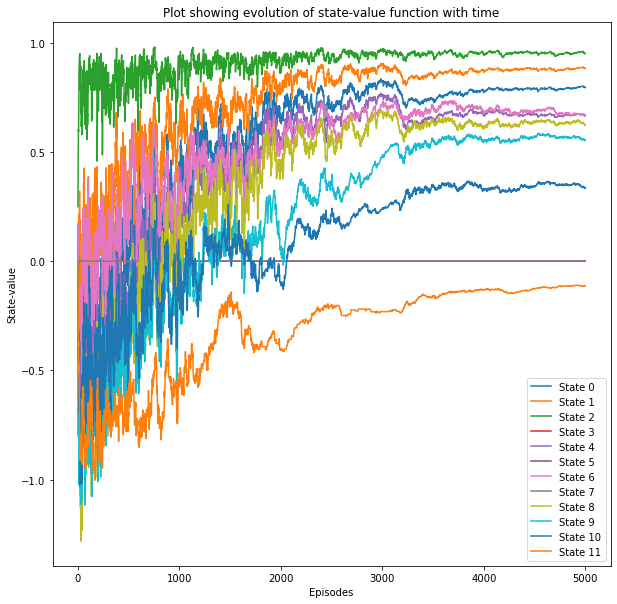

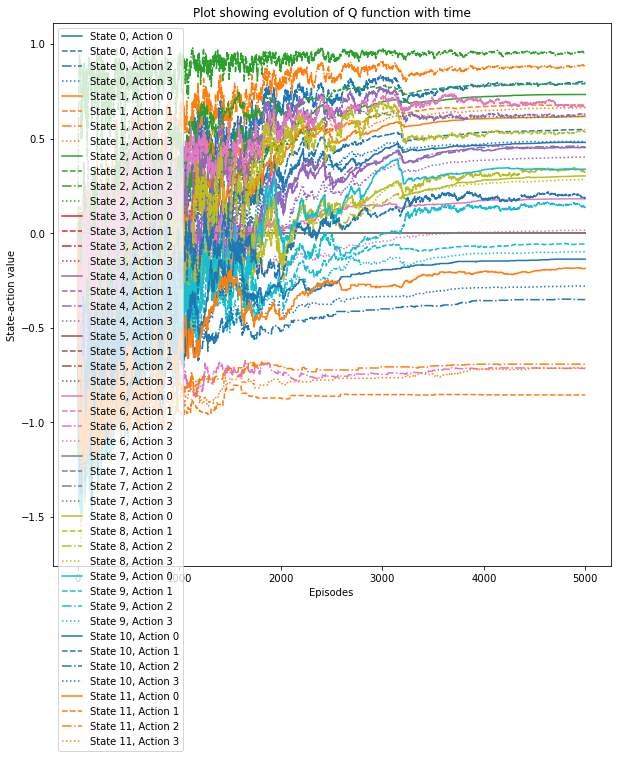

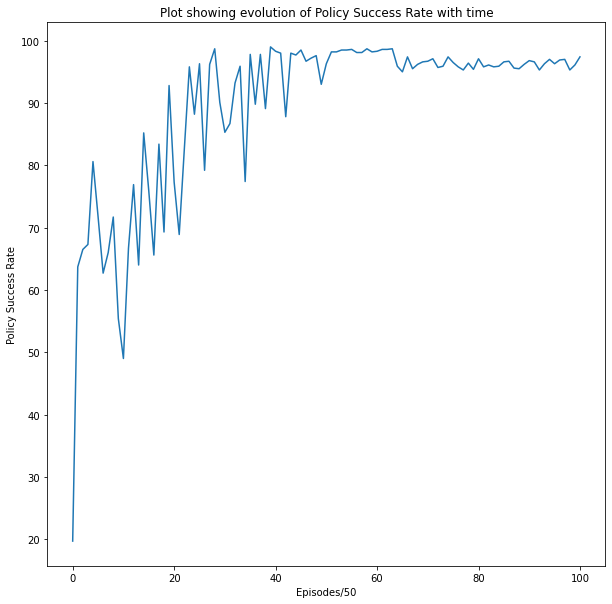

In [22]:
# Creating plots for FVMCC
optimal_policy = create_plots(monte_carlo_control, env, gamma_fvmcc, alpha_fvmcc, epsilon_fvmcc, max_steps, num_episodes, True)

<b>(a) & (b)</b> The plots of V-function vs Time (Episodes) and Q-function vs Time (Episodes) are above

<b>(c)</b> I averaged the results over 10 instances of the environment. The seed for each environment is from 0 to 9 (i.e. 0 for env1, 1 for env2, ..., 9 for env10)

<b>(d)</b>
Optimal Policy obtained using FVMCC algorithm \
<img src="image/optimal_policy_FVMCC.png" style="height:500px">

<b>(e)</b> Final values of hyperparamenters: \
`gamma` = 0.99 \
`alpha` = 0.5 \
`epsilon` = 0.99 \
`max_steps` = 100 \
`num_episodes` = 5000
* Decayed `alpha` and `epsilon` exponentially to 0.01 (as exponential was giving better performance than linear)
* `gamma` and Initial values of `alpha` and `epsilon` are taken to be such that the algorithm converges in minimum time to the real state values
* `max_steps` were taken to be such that almost all the trajectories are completed (i.e. all the trajectories given by the `generate_trajectory` function were reaching a terminal state)
* `num_episodes` is taken such that all the state values converge to their true values (I judged it from the plot. When the curves of all the state values were getting flat, I inferred that they have convereged)

<b>(f)</b> Observations from the plots:
* state2 is the most favourable state to be in, followed by state1, state0 and so on
* The plots has decent amount of variance but seems to be unbiased
* Compared to other algorithms, MC control took a longer time to converge to the optimal solution
* The final Policy Success Rate is almost 100% (~98%) and the plot is going up with time. This implies that our agent is learning (and our code is working fine) and it has almost reached a 100% accuracy

## Problem 2: SARSA (TD Control)
(40+20+20+5+5+5+5=100 points)

Implement the SARSA algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 10, slide 22.

`SARSA(env, γ, α0, ϵ0, noEpisodes)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [23]:
def select_action(s, Q, epsilon):
    a = np.argmax(Q[s])
    if np.random.random() < epsilon:
        a = np.random.randint(0, num_actions)
    
    return a

In [24]:
# SARSA
def sarsa(env, gamma, alpha_initial, epsilon_initial, num_episodes):
    Q = np.zeros((num_states, num_actions))
    Q_s = np.zeros((num_episodes, num_states, num_actions))
    policy_success_rate = np.zeros(num_episodes//psr_gap + 1)
    
    alpha_array = decay(alpha_initial, 0.01, num_episodes, 'exponential')
    epsilon_array = decay(epsilon_initial, 0.01, num_episodes, 'exponential')
    
    for e in range(num_episodes):
        alpha = alpha_array[e]
        epsilon = epsilon_array[e]
        
        s, done = env.reset()
        
        a = select_action(s, Q, epsilon)
        
        while not done:
            next_state, r, done = env.step(a)
            next_action = select_action(s, Q, epsilon)
            
            td_target = r
            if not done:
                td_target += gamma*Q[next_state, next_action]
            Q[s, a] += alpha*(td_target - Q[s, a])
            
            s = next_state
            a = next_action
        
        if e%psr_gap == 0:
            policy_success_rate[int(e/psr_gap)] = get_policy_success_rate(env, Q, goal_state)
        
        Q_s[e] = Q
    
    if num_episodes%psr_gap == 0:
        policy_success_rate[-1] = get_policy_success_rate(env, Q, goal_state)

    V = np.max(Q, axis=1)  # State value function
    V_s = np.max(Q_s, axis=2)  # State value function for every episode
    optimal_policy = get_greedy_policy(Q)  # Optimal policy obtained

    return V_s, Q_s, policy_success_rate, optimal_policy

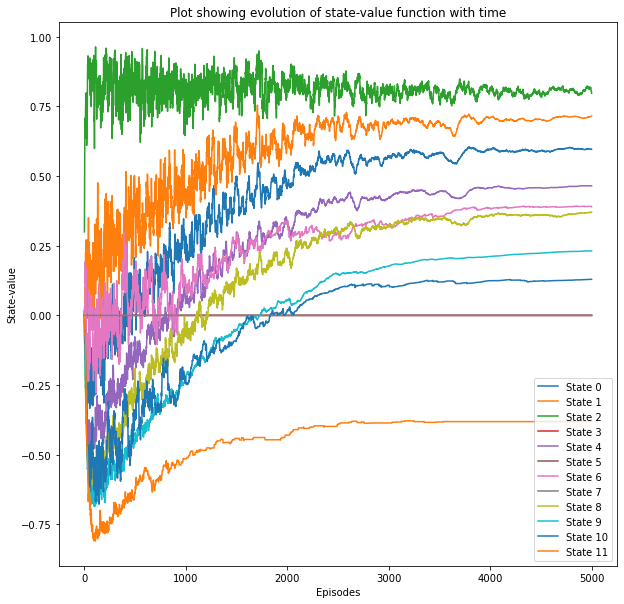

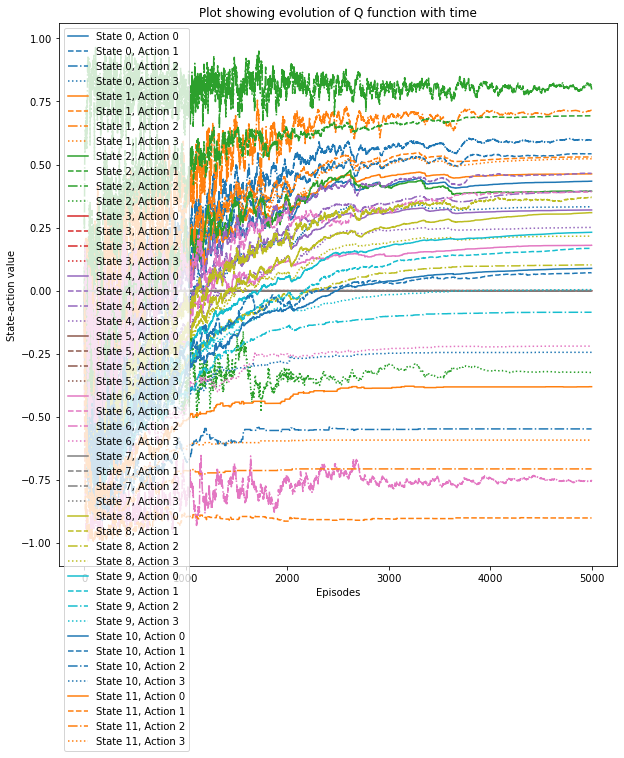

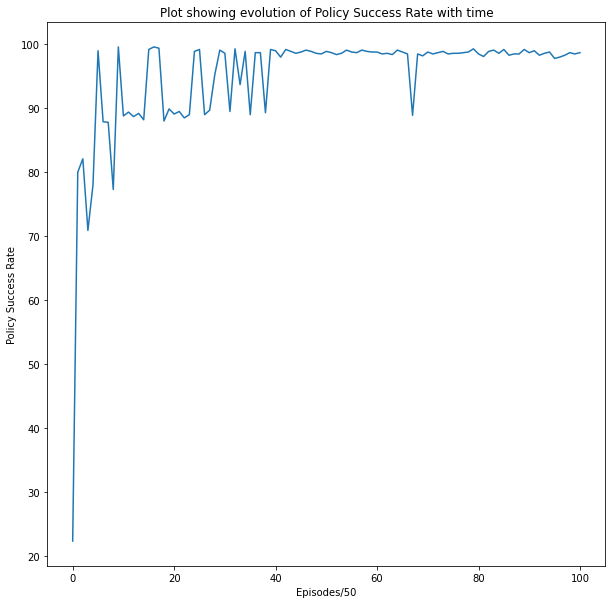

In [25]:
# Creating plots for SARSA
create_plots(sarsa, env, gamma_sarsa, alpha_sarsa, epsilon_sarsa, num_episodes)

<b>(a) & (b)</b> The plots of V-function vs Time (Episodes) and Q-function vs Time (Episodes) are above

<b>(c)</b> I averaged the results over 10 instances of the environment. The seed for each environment is from 0 to 9 (i.e. 0 for env1, 1 for env2, ..., 9 for env10)

<b>(d)</b>
Optimal Policy obtained using SARSA algorithm \
<img src="image/optimal_policy_SARSA.png" style="height:500px">

<b>(e)</b> Final values of hyperparamenters: \
`gamma` = 0.96 \
`alpha` = 0.6 \
`epsilon` = 0.99 \
`max_steps` = 100 \
`num_episodes` = 5000
* Decayed `alpha` and `epsilon` exponentially to 0.01 (as exponential was giving better performance than linear)
* `gamma` and Initial values of `alpha` and `epsilon` are taken to be such that the algorithm converges in minimum time to the real state values
* `max_steps` were taken to be such that almost all the trajectories are completed (i.e. all the trajectories given by the `generate_trajectory` function were reaching a terminal state)
* `num_episodes` is taken such that all the state values converge to their true values (I judged it from the plot. When the curves of all the state values were getting flat, I inferred that they have convereged)

<b>(f)</b> Observations from the plots:
* state2 is the most favourable state to be in, followed by state1, state0 and so on
* The plots has decent amount of variance but seems to be unbiased
* Compared to other algorithms, SARSA took a longer time to converge to the optimal solution
* The final Policy Success Rate is almost 100% (~98%) and the plot is going up with time. This implies that our agent is learning (and our code is working fine) and it has almost reached a 100% accuracy

## Problem 3: Q-Learning
(40+20+20+5+5+5+5=100 points)

Implement the Q-Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 10, slide 25.

`Q-Learning(env, γ, α0, ϵ0, noEpisodes)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [26]:
# Q-Learning
def q_learning(env, gamma, alpha_initial, epsilon_initial, num_episodes):
    Q = np.zeros((num_states, num_actions))
    Q_s = np.zeros((num_episodes, num_states, num_actions))
    policy_success_rate = np.zeros(num_episodes//psr_gap + 1)
    
    alpha_array = decay(alpha_initial, 0.01, num_episodes, 'exponential')
    epsilon_array = decay(epsilon_initial, 0.01, num_episodes, 'exponential')
    
    for e in range(num_episodes):
        alpha = alpha_array[e]
        epsilon = epsilon_array[e]
        
        s, done = env.reset()
        
        while not done:
            a = select_action(s, Q, epsilon)
            next_state, r, done = env.step(a)
            
            td_target = r
            if not done:
                td_target += gamma*np.max(Q[next_state])
            
            Q[s, a] += alpha*(td_target - Q[s, a])
            
            s = next_state
        
        if e%psr_gap == 0:
            policy_success_rate[int(e/psr_gap)] = get_policy_success_rate(env, Q, goal_state)
        
        Q_s[e] = Q
    
    if num_episodes%psr_gap == 0:
        policy_success_rate[-1] = get_policy_success_rate(env, Q, goal_state)
    
    V = np.max(Q, axis=1)  # State value function
    V_s = np.max(Q_s, axis=2)  # State value function for every episode
    optimal_policy = get_greedy_policy(Q)  # Optimal policy obtained

    return V_s, Q_s, policy_success_rate, optimal_policy

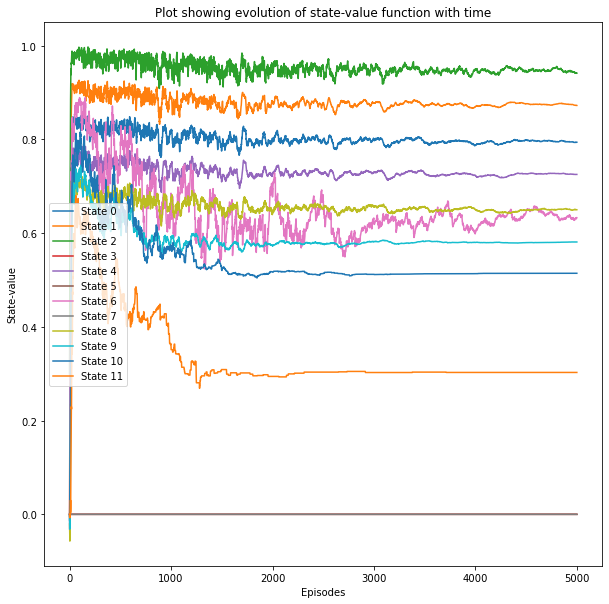

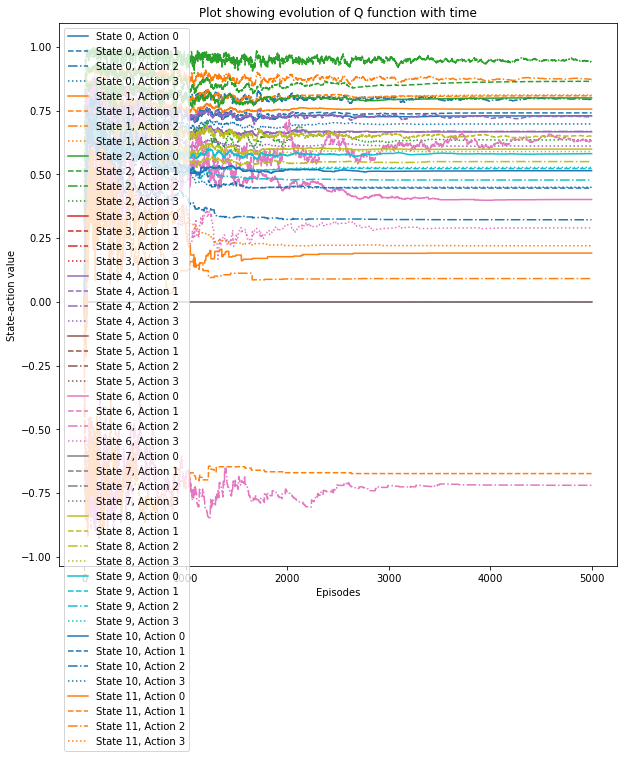

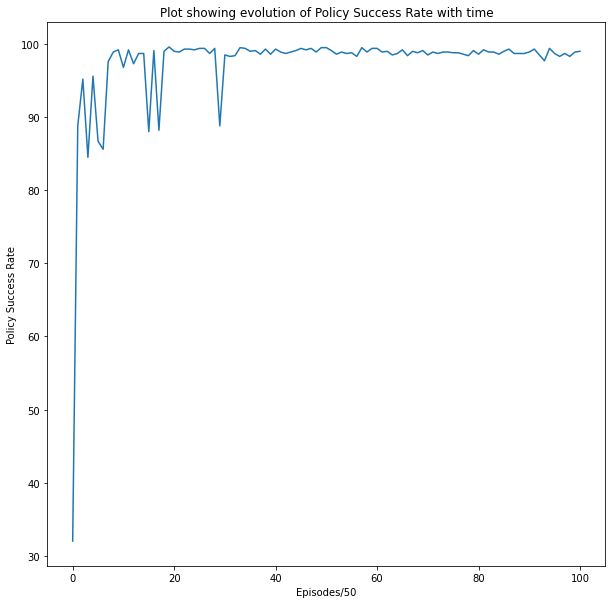

In [27]:
# Creating plots for Q-Learning
create_plots(q_learning, env, gamma_q_learning, alpha_q_learning, epsilon_q_learning, num_episodes)

<b>(a) & (b)</b> The plots of V-function vs Time (Episodes) and Q-function vs Time (Episodes) are above

<b>(c)</b> I averaged the results over 10 instances of the environment. The seed for each environment is from 0 to 9 (i.e. 0 for env1, 1 for env2, ..., 9 for env10)

<b>(d)</b>
Optimal Policy obtained using Q-Learning algorithm \
<img src="image/optimal_policy_q_learning.png" style="height:500px">

<b>(e)</b> Final values of hyperparamenters: \
`gamma` = 0.98 \
`alpha` = 0.6 \
`epsilon` = 0.99 \
`max_steps` = 100 \
`num_episodes` = 5000
* Decayed `alpha` and `epsilon` exponentially to 0.01 (as exponential was giving better performance than linear)
* `gamma` and Initial values of `alpha` and `epsilon` are taken to be such that the algorithm converges in minimum time to the real state values
* `max_steps` were taken to be such that almost all the trajectories are completed (i.e. all the trajectories given by the `generate_trajectory` function were reaching a terminal state)
* `num_episodes` is taken such that all the state values converge to their true values (I judged it from the plot. When the curves of all the state values were getting flat, I inferred that they have convereged)

<b>(f)</b> Observations from the plots:
* state2 is the most favourable state to be in, followed by state1, state0 and so on
* The plots has low variance (lower than the above 2) and seems to be bit biased
* Compared to other algorithms, Q-Learning took little time to converge to the optimal solution
* The final Policy Success Rate is almost 100% (~99%) and the plot is going up with time. This implies that our agent is learning (and our code is working fine) and it has almost reached a 100% accuracy

## Problem 4: Double Q-Learning
(40+20+20+5+5+5+5=100 points)

Implement the Double Q-Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 10, slides 27, 28.

`Double-Q-Learning(env, γ, α0, ϵ0, noEpisodes)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [28]:
# Double Q-Learning
def double_q_learning(env, gamma, alpha_initial, epsilon_initial, num_episodes):
    Q = np.zeros((num_states, num_actions))
    Q_s = np.zeros((num_episodes, num_states, num_actions))
    policy_success_rate = np.zeros(num_episodes//psr_gap + 1)
    
    Q1 = np.zeros((num_states, num_actions))
    Q2 = np.zeros((num_states, num_actions))
    Q_s1 = np.zeros((num_episodes, num_states, num_actions))
    Q_s2 = np.zeros((num_episodes, num_states, num_actions))
    
    alpha_array = decay(alpha_initial, 0.01, num_episodes, 'exponential')
    epsilon_array = decay(epsilon_initial, 0.01, num_episodes, 'exponential')
    
    for e in range(num_episodes):
        alpha = alpha_array[e]
        epsilon = epsilon_array[e]
        
        s, done = env.reset()
        
        while not done:
            a = select_action(s, Q, epsilon)
            next_state, r, done = env.step(a)
            
            if np.random.randint(2) == 0:
                a1 = np.argmax(Q1[next_state])
                
                td_target = r
                if not done:
                    td_target += gamma*Q2[next_state, a1]
                
                Q1[s, a] += alpha*(td_target - Q1[s, a])
            else:
                a2 = np.argmax(Q2[next_state])
                
                td_target = r
                if not done:
                    td_target += gamma*Q1[next_state, a2]
                
                Q2[s, a] += alpha*(td_target - Q2[s, a])
            
            s = next_state

        if e%psr_gap == 0:
            policy_success_rate[int(e/psr_gap)] = get_policy_success_rate(env, Q, goal_state)
        
        Q_s1[e] = Q1
        Q_s2[e] = Q2
        Q = (Q1 + Q2)/2
        Q_s = (Q_s1 + Q_s2)/2
    
    if num_episodes%psr_gap == 0:
        policy_success_rate[-1] = get_policy_success_rate(env, Q, goal_state)
    
    V = np.max(Q, axis=1)  # State value function
    V_s = np.max(Q_s, axis=2)  # State value function for every episode
    optimal_policy = get_greedy_policy(Q)  # Optimal policy obtained

    return V_s, Q_s, policy_success_rate, optimal_policy

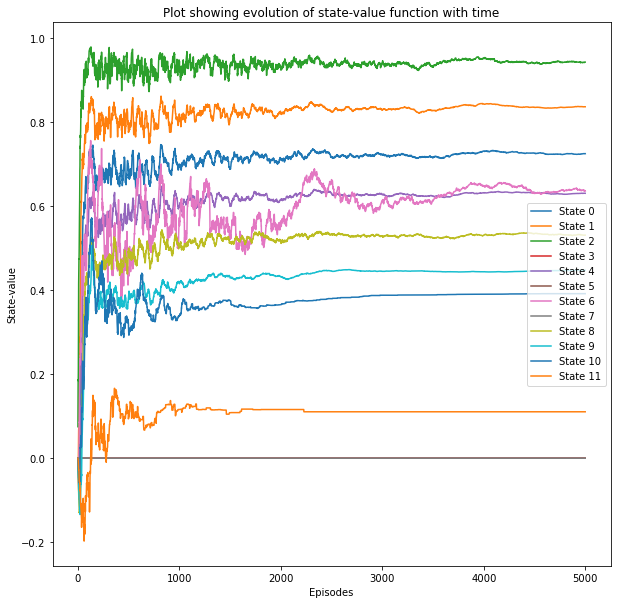

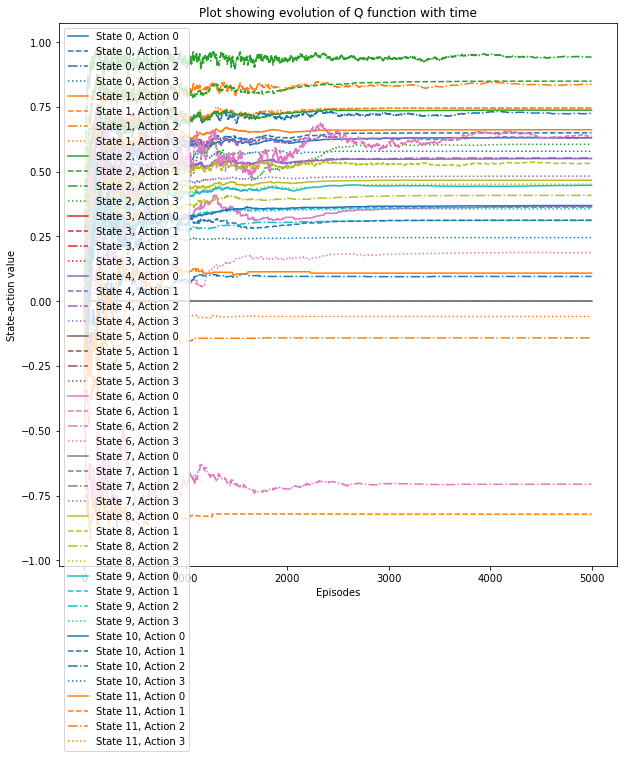

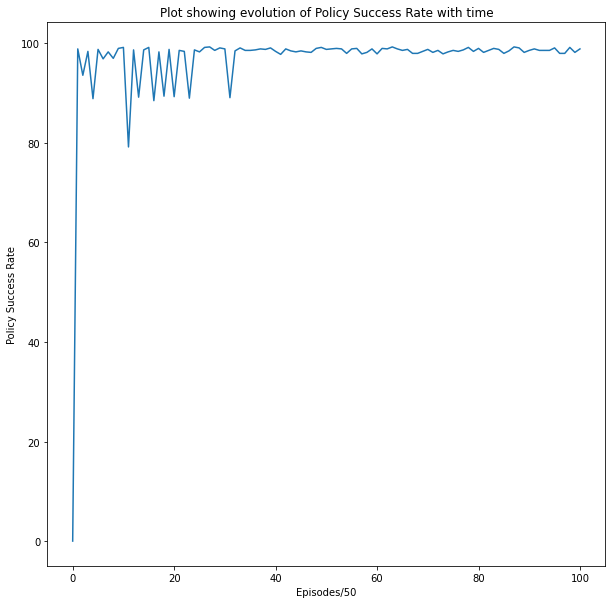

In [29]:
# Creating plots for Double-Q-Learning
create_plots(double_q_learning, env, gamma_double_q_learning, alpha_double_q_learning, epsilon_double_q_learning, num_episodes)

<b>(a) & (b)</b> The plots of V-function vs Time (Episodes) and Q-function vs Time (Episodes) are above

<b>(c)</b> I averaged the results over 10 instances of the environment. The seed for each environment is from 0 to 9 (i.e. 0 for env1, 1 for env2, ..., 9 for env10)

<b>(d)</b>
Optimal Policy obtained using Double Q-Learning algorithm \
<img src="image/optimal_policy_double_q_learning.png" style="height:500px">

<b>(e)</b> Final values of hyperparamenters: \
`gamma` = 0.95 \
`alpha` = 0.5 \
`epsilon` = 0.99 \
`max_steps` = 100 \
`num_episodes` = 5000
* Decayed `alpha` and `epsilon` exponentially to 0.01 (as exponential was giving better performance than linear)
* `gamma` and Initial values of `alpha` and `epsilon` are taken to be such that the algorithm converges in minimum time to the real state values
* `max_steps` were taken to be such that almost all the trajectories are completed (i.e. all the trajectories given by the `generate_trajectory` function were reaching a terminal state)
* `num_episodes` is taken such that all the state values converge to their true values (I judged it from the plot. When the curves of all the state values were getting flat, I inferred that they have convereged)

<b>(f)</b> Observations from the plots:
* state2 is the most favourable state to be in, followed by state1, state0 and so on
* The plots has low variance and seems to be unbiased (or have very low bias)
* Compared to other algorithms, Double Q-Learning converged to the optimal solution pretty quickly
* The final Policy Success Rate is almost 100% (~99%) and the plot is going up with time. This implies that our agent is learning (and our code is working fine) and it has almost reached a 100% accuracy

## Problem 5: Comparing Control Algorithms
(20+5+5+5+5+5=40 points)

For FVMCC, SARSA, Q and Double-Q algorithms implemented above, do the following:

(a) For each of the algorithm, in a single plot, plot the evolution of Policy Success Rate (in %) vs Episodes. Policy Success Rate is defined as number of times the agent reaches the goal state out of the total number of the episodes run using a specific policy. Basically implement the following function that would return the policy success percentage. As you are training the agent, at each episode, you will have a version of the policy, use that  policy along with the function below to get the policy success rate.

    `def getPolicySuccessRate(env, π_current, goalState, maxEpisodes = 100, maxSteps = 200)`
    
    
    
(b) What are your observations from the Policy Success Rate (in %) plot.

(c) For each of the algorithm (in a single plot), plot the Estimated Expected Return (from the start state) vs Episodes.

(d) What are your observations for the Estimated Expected Return plot?

(e) For each of the algorithm (in a single plot), plot the State-value Function Estimation Error vs Episodes. State-value Function Estimation Error is defined as Mean Absolute Error across all V-function estimates (across all states) from the respective optimal value.

(f) What are your observations for the State-value Function Estimation Error plot?

In [15]:
# Run episodes with the policy passed as an argument and compute success rate
def get_policy_success_rate(env, current_policy, goal_state, max_episodes = 100, max_steps = 200):
    num_successes = 0
    
    for _ in range(max_episodes):
        t = generate_trajectory(env, current_policy, 0, max_steps)
        if t:
            if t[-1][2] == goal_state:
                num_successes += 1
    
    policy_success_rate = num_successes*100/max_episodes
    
    return policy_success_rate

In [39]:
def plot_policy_success_rate(algo_list):    
    data = np.zeros((num_episodes//psr_gap + 1, len(algo_list)))
    
    for i, algo in enumerate(algo_list):
        data[:, i] = psr[algo]
    
    curves = plt.plot(data)
    plt.legend(curves, algo_list)
    plt.title('Plot showing evolution of PSR with time')
    plt.xlabel('Episodes')
    plt.ylabel('Policy Success Rate')
    plt.show()

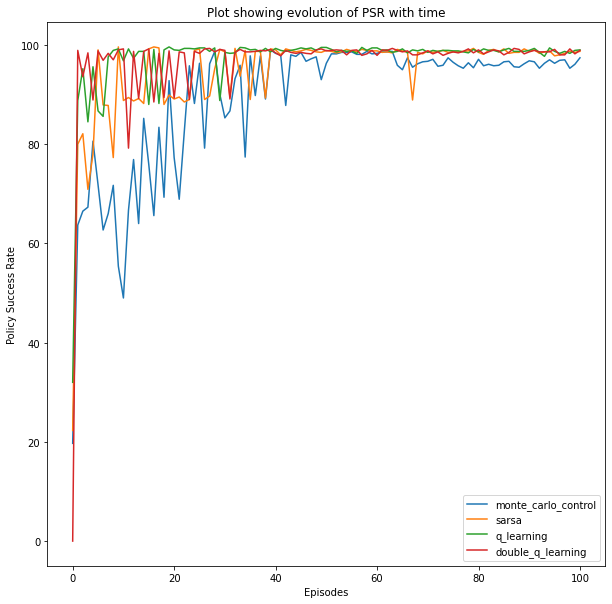

In [40]:
plot_policy_success_rate(['monte_carlo_control', 'sarsa', 'q_learning', 'double_q_learning'])

<b>(a)</b> Plotted above \
<b>(b)</b>
* Monte Carlo is the slowest followed by SARSA, Q-Learning and Double Q-Learning
* Both Q-Learning and Double Q-Learning performed equally well

## Problem 6: SARSA(λ) Replacing
(40+20+20+5+5+5+5=100 points)

Implement the SARSA(λ) algorithm with Replacing Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 29, 30.

`SARSA-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = True)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [31]:
def clip(E, s, a):
    E[s, :] = 0
    E[s, a] = 1

In [32]:
# SARSA-lambda Replacing
def sarsa_lambda(env, gamma, alpha_initial, epsilon_initial, lda, num_episodes, replace_trace = True):
    Q = np.zeros((num_states, num_actions))
    E = np.zeros((num_states, num_actions))
    Q_s = np.zeros((num_episodes, num_states, num_actions))
    policy_success_rate = np.zeros(num_episodes//psr_gap + 1)
    
    alpha_array = decay(alpha_initial, 0.01, num_episodes, 'exponential')
    epsilon_array = decay(epsilon_initial, 0.01, num_episodes, 'exponential')
    
    for e in range(num_episodes):
        alpha = alpha_array[e]
        epsilon = epsilon_array[e]
        E = E*0
        
        s, done = env.reset()
        a = select_action(s, Q, epsilon)
        
        while not done:
            next_state, r, done = env.step(a)
            next_action = select_action(next_state, Q, epsilon)
            
            td_target = r
            if not done:
                td_target += gamma*Q[next_state, next_action]
            td_error = td_target - Q[s, a]
            
            E[s, a] += 1
            
            if replace_trace:
                clip(E, s, a)
            
            Q += alpha*td_error*E
            
            E = gamma*lda*E
            
            s = next_state
            a = next_action
        
        if e%psr_gap == 0:
            policy_success_rate[int(e/psr_gap)] = get_policy_success_rate(env, Q, goal_state)
        
        Q_s[e] = Q
    
    if num_episodes%psr_gap == 0:
        policy_success_rate[-1] = get_policy_success_rate(env, Q, goal_state)
    
    V = np.max(Q, axis=1)  # State value function
    V_s = np.max(Q_s, axis=2)  # State value function for every episode
    optimal_policy = get_greedy_policy(Q)  # Optimal policy obtained

    return V_s, Q_s, policy_success_rate, optimal_policy

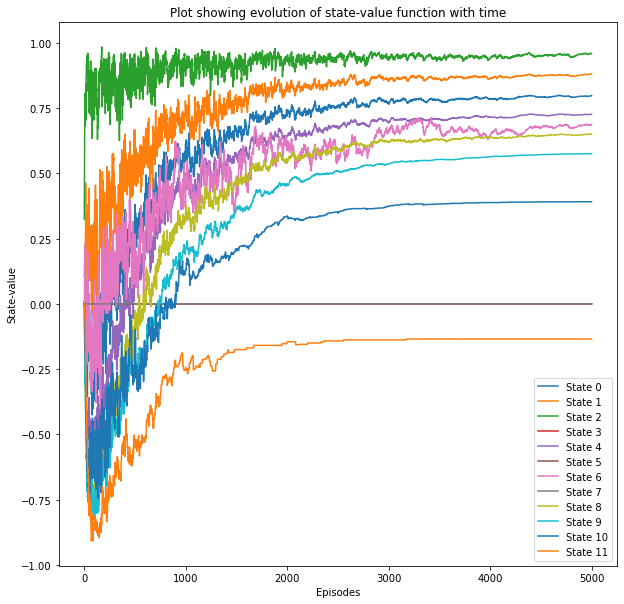

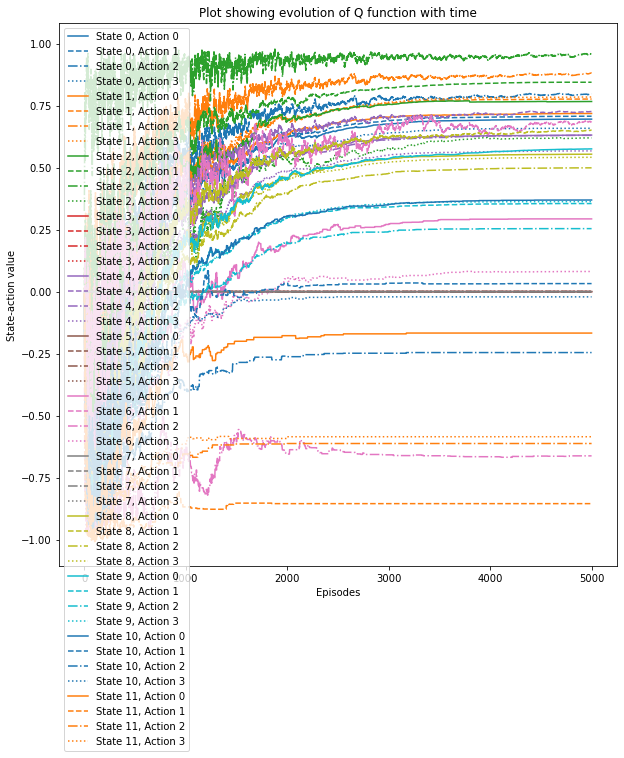

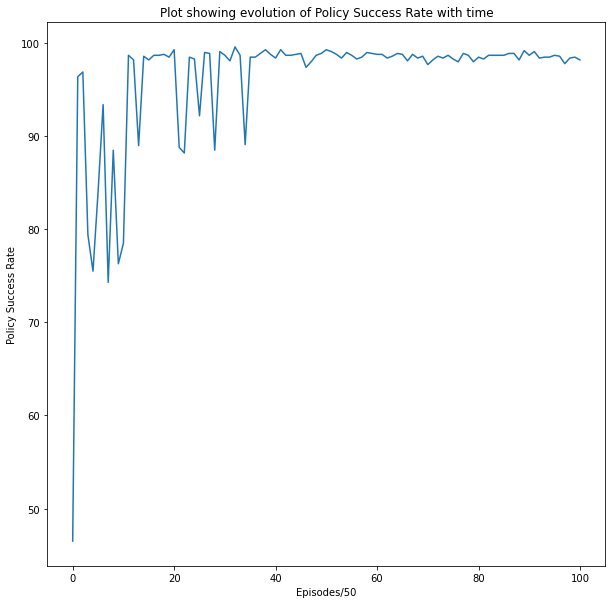

In [41]:
# Creating plots for SARSA-lambda with replacing eligibility traces
create_plots(sarsa_lambda, env, gamma_sarsa_lambda_replacing, alpha_sarsa_lambda_replacing, epsilon_sarsa_lambda_replacing, lambda_sarsa_lambda_accumulating, num_episodes, True)

<b>(a) & (b)</b> The plots of V-function vs Time (Episodes) and Q-function vs Time (Episodes) are above

<b>(c)</b> I averaged the results over 10 instances of the environment. The seed for each environment is from 0 to 9 (i.e. 0 for env1, 1 for env2, ..., 9 for env10)

<b>(d)</b>
Optimal Policy obtained using SARSA lambda (Replacing) algorithm \
<img src="image/optimal_policy_sarsa_lambda_replacing.png" style="height:500px">

<b>(e)</b> Final values of hyperparamenters: \
`gamma` = 0.98 \
`alpha` = 0.65 \
`epsilon` = 0.99 \
`lambda` = 0.5 \
`max_steps` = 100 \
`num_episodes` = 5000
* Decayed `alpha` and `epsilon` exponentially to 0.01 (as exponential was giving better performance than linear)
* `gamma`, `lambda` and Initial values of `alpha` and `epsilon` are taken to be such that the algorithm converges in minimum time to the real state values
* `max_steps` were taken to be such that almost all the trajectories are completed (i.e. all the trajectories given by the `generate_trajectory` function were reaching a terminal state)
* `num_episodes` is taken such that all the state values converge to their true values (I judged it from the plot. When the curves of all the state values were getting flat, I inferred that they have convereged)

<b>(f)</b> Observations from the plots:
* state2 is the most favourable state to be in, followed by state1, state0 and so on
* The plots has decent variance and seems to be unbiased (or have very low bias)
* Compared to other algorithms, SARSA lambda (Replacing) converged to the optimal solution very quickly
* The final Policy Success Rate is almost 100% (~99%) and the plot is going up with time. This implies that our agent is learning (and our code is working fine) and it has almost reached a 100% accuracy

## Problem 7: SARSA(λ) Accumulating
(40+20+20+5+5+5+5=100 points)

Implement the SARSA(λ) algorithm with Accumulating Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 29, 30.

`SARSA-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = False)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

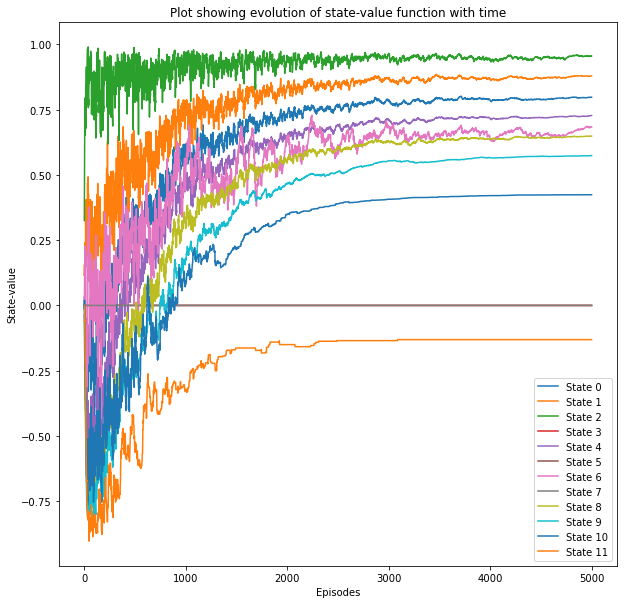

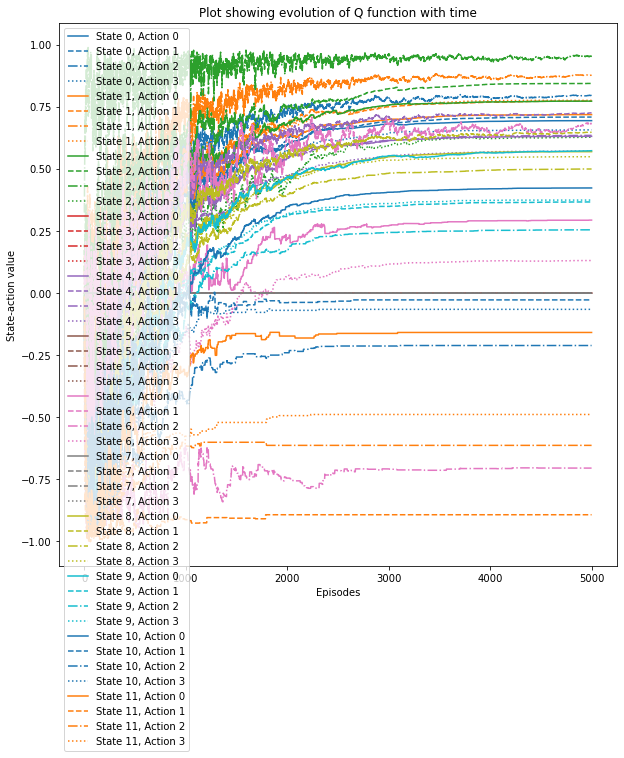

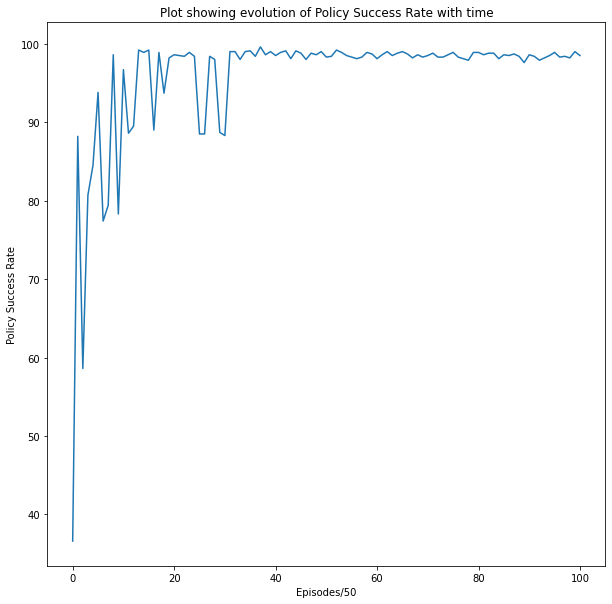

In [42]:
# Creating plots for SARSA-lambda with accumulating eligibility traces
create_plots(sarsa_lambda, env, gamma_sarsa_lambda_accumulating, alpha_sarsa_lambda_accumulating, epsilon_sarsa_lambda_accumulating, lambda_sarsa_lambda_accumulating, num_episodes, False)

<b>(a) & (b)</b> The plots of V-function vs Time (Episodes) and Q-function vs Time (Episodes) are above

<b>(c)</b> I averaged the results over 10 instances of the environment. The seed for each environment is from 0 to 9 (i.e. 0 for env1, 1 for env2, ..., 9 for env10)

<b>(d)</b>
Optimal Policy obtained using SARSA lambda (Accumulating) algorithm \
<img src="image/optimal_policy_sarsa_lambda_accumulating.png" style="height:500px">

<b>(e)</b> Final values of hyperparamenters: \
`gamma` = 0.98 \
`alpha` = 0.65 \
`epsilon` = 0.99 \
`lambda` = 0.5 \
`max_steps` = 100 \
`num_episodes` = 5000
* Decayed `alpha` and `epsilon` exponentially to 0.01 (as exponential was giving better performance than linear)
* `gamma`, `lambda` and Initial values of `alpha` and `epsilon` are taken to be such that the algorithm converges in minimum time to the real state values
* `max_steps` were taken to be such that almost all the trajectories are completed (i.e. all the trajectories given by the `generate_trajectory` function were reaching a terminal state)
* `num_episodes` is taken such that all the state values converge to their true values (I judged it from the plot. When the curves of all the state values were getting flat, I inferred that they have convereged)

<b>(f)</b> Observations from the plots:
* state2 is the most favourable state to be in, followed by state1, state0 and so on
* The plots has decent variance and seems to be unbiased (or have very low bias)
* Compared to other algorithms, SARSA lambda (Accumulating) took some time to converged to the optimal solution
* The final Policy Success Rate is almost 100% (~99%) and the plot is going up with time. This implies that our agent is learning (and our code is working fine) and it has almost reached a 100% accuracy

## Problem 8: Q(λ) Replacing
(40+20+20+5+5+5+5=100 points)

Implement the Q(λ) algorithm with Replacing Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 32, 33.

`Q-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = True)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [35]:
# Q-lambda Replacing
def q_lambda(env, gamma, alpha_initial, epsilon_initial, lda, num_episodes, replace_trace = True):
    Q = np.zeros((num_states, num_actions))
    E = np.zeros((num_states, num_actions))
    Q_s = np.zeros((num_episodes, num_states, num_actions))
    policy_success_rate = np.zeros(num_episodes//psr_gap + 1)
    
    alpha_array = decay(alpha_initial, 0.01, num_episodes, 'exponential')
    epsilon_array = decay(epsilon_initial, 0.01, num_episodes, 'exponential')
    
    for e in range(num_episodes):
        alpha = alpha_array[e]
        epsilon = epsilon_array[e]
        E = E*0
        
        s, done = env.reset()
        a = select_action(s, Q, epsilon)
        
        while not done:
            next_state, r, done = env.step(a)
            next_action = select_action(next_state, Q, epsilon)
            
            is_next_action_greedy = False
            if Q[next_state, next_action] == np.max(Q[next_state, :]):
                is_next_action_greedy = True
            
            td_target = r
            if not done:
                td_target += gamma*np.max(Q[next_action, :])
            td_error = td_target - Q[s, a]
            
            if replace_trace:
                E[s] = 0
            
            E[s, a] += 1
            
            Q += alpha*td_error*E
            
            if is_next_action_greedy:
                E = gamma*lda*E
            else:
                E = E*0
            
            s = next_state
            a = next_action
        
        if e%psr_gap == 0:
            policy_success_rate[int(e/psr_gap)] = get_policy_success_rate(env, Q, goal_state)
        
        Q_s[e] = Q
    
    if num_episodes%psr_gap == 0:
        policy_success_rate[-1] = get_policy_success_rate(env, Q, goal_state)
    
    V = np.max(Q, axis=1)  # State value function
    V_s = np.max(Q_s, axis=2)  # State value function for every episode
    optimal_policy = get_greedy_policy(Q)  # Optimal policy obtained

    return V_s, Q_s, policy_success_rate, optimal_policy

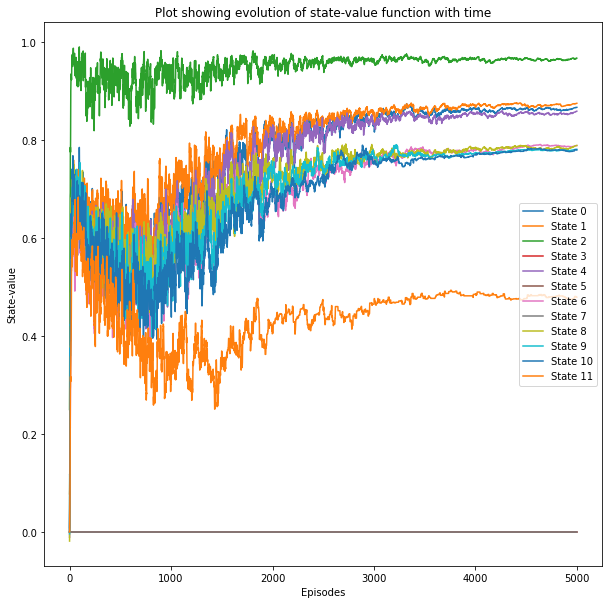

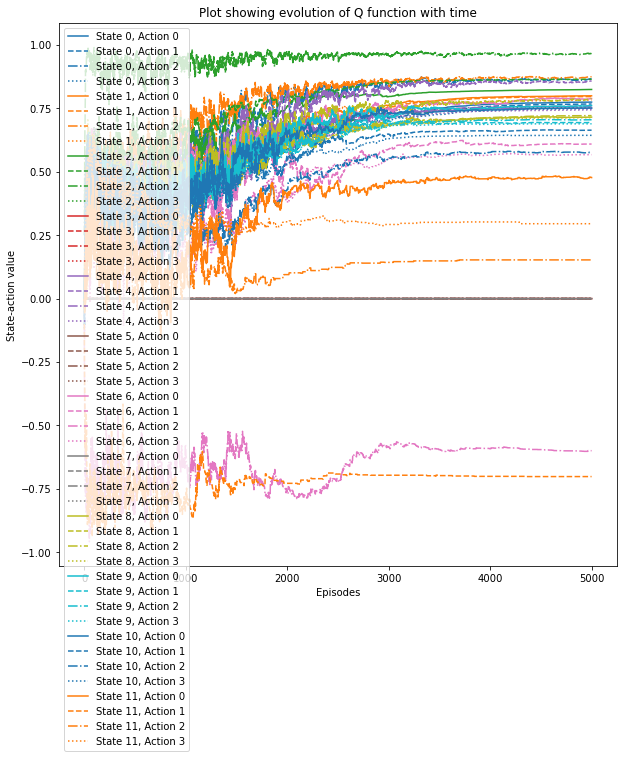

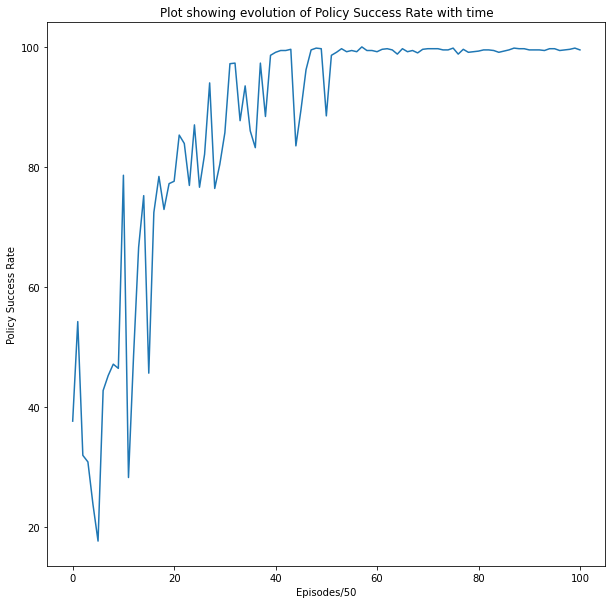

In [43]:
# Creating plots for Q-lambda with replacing eligibility traces
create_plots(q_lambda, env, gamma_q_lambda_replacing, alpha_q_lambda_replacing, epsilon_q_lambda_replacing, lambda_q_lambda_replacing, num_episodes, True)

<b>(a) & (b)</b> The plots of V-function vs Time (Episodes) and Q-function vs Time (Episodes) are above

<b>(c)</b> I averaged the results over 10 instances of the environment. The seed for each environment is from 0 to 9 (i.e. 0 for env1, 1 for env2, ..., 9 for env10)

<b>(d)</b>
Optimal Policy obtained using Double Q-lambda (Replacing) algorithm \
<img src="image/optimal_policy_q_lambda_replacing.png" style="height:500px">

<b>(e)</b> Final values of hyperparamenters: \
`gamma` = 0.95 \
`alpha` = 0.5 \
`epsilon` = 0.99 \
`lambda` = 0.55 \
`max_steps` = 100 \
`num_episodes` = 5000
* Decayed `alpha` and `epsilon` exponentially to 0.01 (as exponential was giving better performance than linear)
* `gamma`, `lambda` and Initial values of `alpha` and `epsilon` are taken to be such that the algorithm converges in minimum time to the real state values
* `max_steps` were taken to be such that almost all the trajectories are completed (i.e. all the trajectories given by the `generate_trajectory` function were reaching a terminal state)
* `num_episodes` is taken such that all the state values converge to their true values (I judged it from the plot. When the curves of all the state values were getting flat, I inferred that they have convereged)

<b>(f)</b> Observations from the plots:
* state2 is the most favourable state to be in, followed by state1, state0 and so on
* The plots has large variance and decent amount of bias
* Compared to other algorithms, Q-lambda (Replacing) converged to the optimal solution pretty slowly
* The final Policy Success Rate is almost 100% (~99%) and the plot is going up with time. This implies that our agent is learning (and our code is working fine) and it has almost reached a 100% accuracy

## Problem 9: Q(λ) Accumulating
(40+20+20+5+5+5+5=100 points)

Implement the Q(λ) algorithm with Accumulating Eligibility Traces for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 32, 33.

`Q-Lambda(env, γ, α0, ϵ0, λ, noEpisodes, replaceTrace = False)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

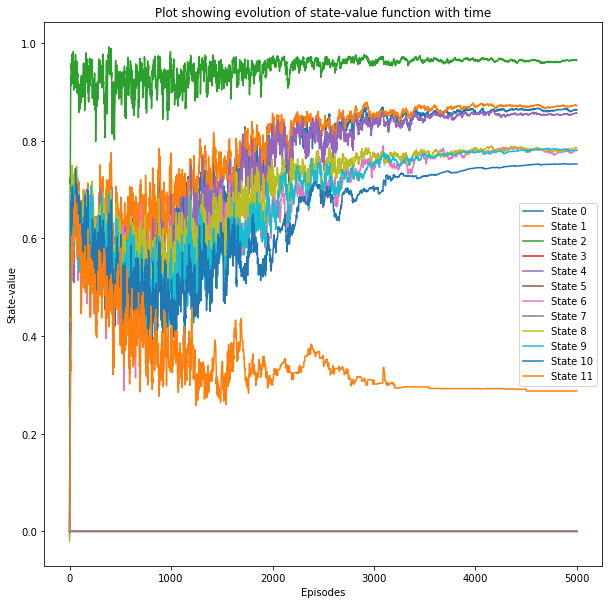

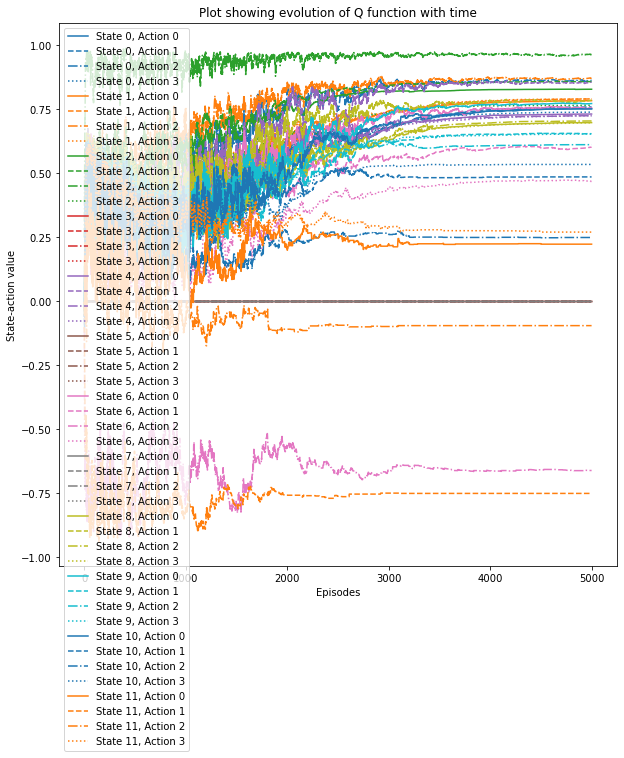

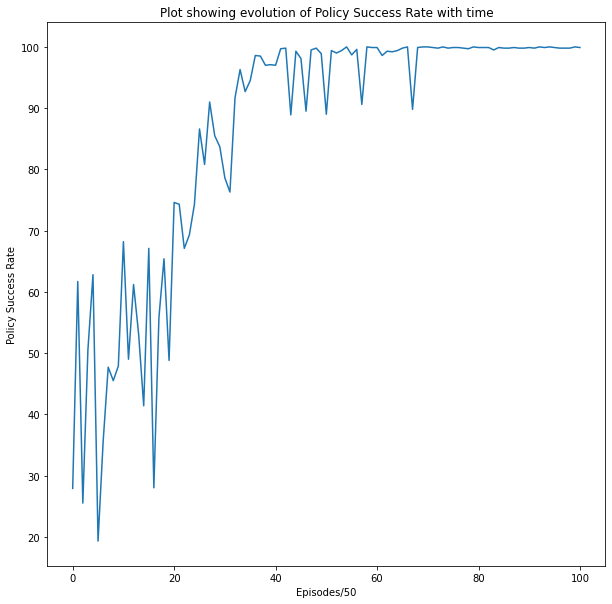

In [44]:
# Creating plots for Q-lambda with accumulating eligibility traces
create_plots(q_lambda, env, gamma_q_lambda_accumulating, alpha_q_lambda_accumulating, epsilon_q_lambda_accumulating, lambda_q_lambda_accumulating, num_episodes, False)

<b>(a) & (b)</b> The plots of V-function vs Time (Episodes) and Q-function vs Time (Episodes) are above

<b>(c)</b> I averaged the results over 10 instances of the environment. The seed for each environment is from 0 to 9 (i.e. 0 for env1, 1 for env2, ..., 9 for env10)

<b>(d)</b>
Optimal Policy obtained using Q-lambda (Accumulating) algorithm \
<img src="image/optimal_policy_q_lambda_accumulating.png" style="height:500px">

<b>(e)</b> Final values of hyperparamenters: \
`gamma` = 0.95 \
`alpha` = 0.5 \
`epsilon` = 0.99 \
`lambda` = 0.55 \
`max_steps` = 100 \
`num_episodes` = 5000
* Decayed `alpha` and `epsilon` exponentially to 0.01 (as exponential was giving better performance than linear)
* `gamma`, `lambda` and Initial values of `alpha` and `epsilon` are taken to be such that the algorithm converges in minimum time to the real state values
* `max_steps` were taken to be such that almost all the trajectories are completed (i.e. all the trajectories given by the `generate_trajectory` function were reaching a terminal state)
* `num_episodes` is taken such that all the state values converge to their true values (I judged it from the plot. When the curves of all the state values were getting flat, I inferred that they have convereged)

<b>(f)</b> Observations from the plots:
* state2 is the most favourable state to be in, followed by state1, state0 and so on
* The plots has high variance and good amount of bias
* Compared to other algorithms, Q-lambda (Accumulating) converged to the optimal solution pretty slowly
* The final Policy Success Rate is almost 100% (~99%) and the plot is going up with time. This implies that our agent is learning (and our code is working fine) and it has almost reached a 100% accuracy

## Problem 10: Dyna-Q
(40+20+20+5+5+5+5=100 points)

Implement the Dyna-Q algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 36, 37.

`Dyna-Q(env, γ, α0, ϵ0, noEpisodes, noPlanning)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [47]:
def get_visited_states_and_actions_taken(T):
    states_visited = np.zeros(num_states)
    actions_taken = np.zeros((num_states, num_actions))
    
    for s in range(num_states):
        for a in range(num_actions):
            if np.sum(T[s, a]) != 0:
                states_visited[s] = 1
                actions_taken[s, a] = 1
    
    states = []
    actions_in_state = []
    
    for i in range(num_states):
        actions = []
        if states_visited[i] == 1:
            states.append(i)
            
            for j in range(num_actions):
                if actions_taken[i, j] == 1:
                    actions.append(j)
        actions_in_state.append(actions)
    
    return states, actions_in_state
                

In [48]:
# Dyna-Q
def dyna_q(env, gamma, alpha_initial, epsilon_initial, num_episodes, num_planning):
    Q = np.zeros((num_states, num_actions))
    E = np.zeros((num_states, num_actions))
    Q_s = np.zeros((num_episodes, num_states, num_actions))
    T = np.zeros((num_states, num_actions, num_states))
    R = np.zeros((num_states, num_actions, num_states))
    policy_success_rate = np.zeros(num_episodes//psr_gap + 1)
    
    alpha_array = decay(alpha_initial, 0.01, num_episodes, 'exponential')
    epsilon_array = decay(epsilon_initial, 0.01, num_episodes, 'exponential')
    
    for e in range(num_episodes):
        alpha = alpha_array[e]
        epsilon = epsilon_array[e]
        E = E*0
        
        s, done = env.reset()
        
        while not done:
            a = select_action(s, Q, epsilon)
            next_state, r, done = env.step(a)
            
            T[s, a, next_state] += 1
            
            r_diff = r  - R[s, a, next_state]
            
            R[s, a, next_state] += (r_diff/T[s, a, next_state])
            
            td_target = r
            if not done:
                td_target += gamma*np.max(Q[next_state, :])
            td_error = td_target - Q[s, a]
            
            Q[s, a] += alpha*td_error
            
            s_backup = next_state
            
            for _ in range(num_planning):
                if np.sum(Q) == 0:
                    break
                
                s_visited, a_taken = get_visited_states_and_actions_taken(T)
                
                s = np.random.choice(s_visited)
                a = np.random.choice(a_taken[s])
                
                prob_next_state = T[s, a]/np.sum(T[s, a])
                
                next_state = np.random.choice(range(num_states), p=prob_next_state)
                r = R[s, a, next_state]
                
                td_target = r + gamma*np.max(Q[next_state])
                td_error = td_target - Q[s, a]
                Q[s, a] += alpha*td_error
            
            s = s_backup
        
        if e%psr_gap == 0:
            policy_success_rate[int(e/psr_gap)] = get_policy_success_rate(env, Q, goal_state)
        
        Q_s[e] = Q
        
                
        
    if num_episodes%psr_gap == 0:
        policy_success_rate[-1] = get_policy_success_rate(env, Q, goal_state)
    
    V = np.max(Q, axis=1)  # State value function
    V_s = np.max(Q_s, axis=2)  # State value function for every episode
    optimal_policy = get_greedy_policy(Q)  # Optimal policy obtained

    return V_s, Q_s, policy_success_rate, optimal_policy

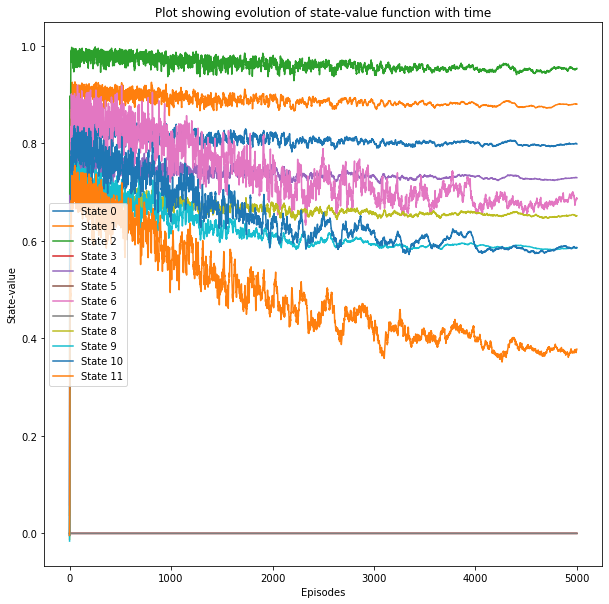

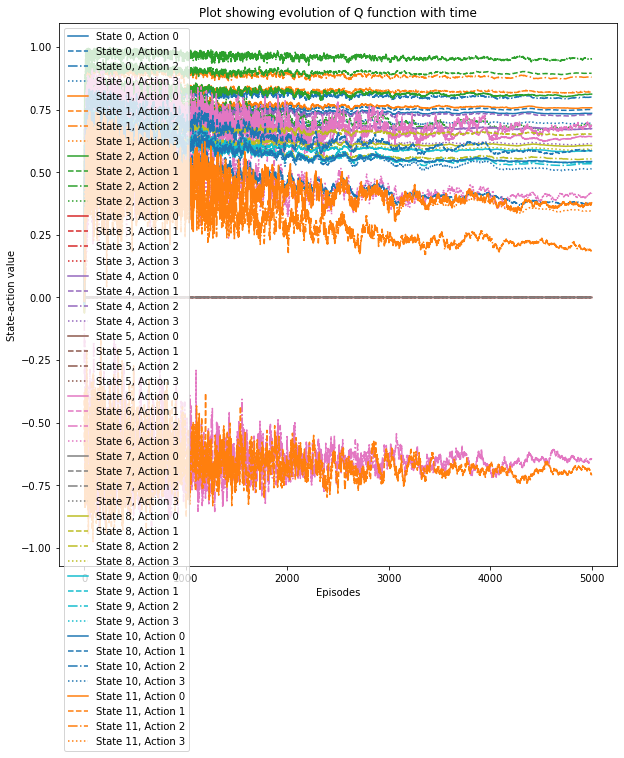

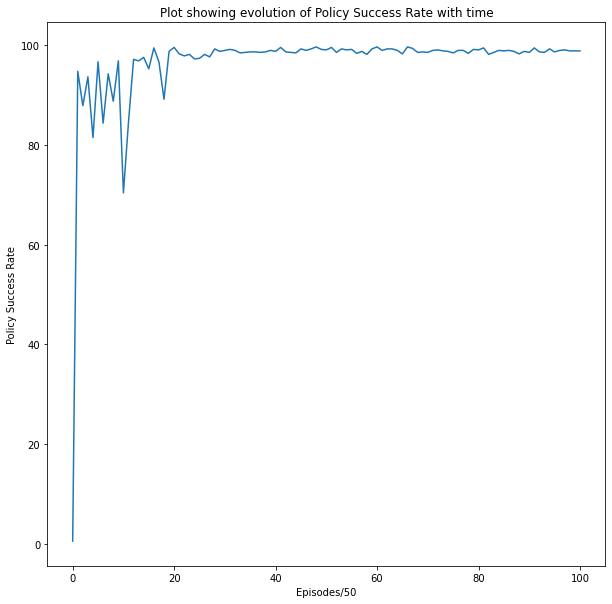

In [49]:
# Creating plots for Dyna-Q
create_plots(dyna_q, env, gamma_dyna_q, alpha_dyna_q, epsilon_dyna_q, num_episodes, num_planning_dyna_q)

<b>(a) & (b)</b> The plots of V-function vs Time (Episodes) and Q-function vs Time (Episodes) are above

<b>(c)</b> I averaged the results over 10 instances of the environment. The seed for each environment is from 0 to 9 (i.e. 0 for env1, 1 for env2, ..., 9 for env10)

<b>(d)</b>
Optimal Policy obtained using Dyna-Q algorithm \
<img src="image/optimal_policy_dyna_q.png" style="height:500px">

<b>(e)</b> Final values of hyperparamenters: \
`gamma` = 0.98 \
`alpha` = 0.7 \
`epsilon` = 0.99 \
`num_planning` = 5 \
`max_steps` = 100 \
`num_episodes` = 5000
* Decayed `alpha` and `epsilon` exponentially to 0.01 (as exponential was giving better performance than linear)
* `gamma`, `num_planning` and Initial values of `alpha` and `epsilon` are taken to be such that the algorithm converges in minimum time to the real state values
* `max_steps` were taken to be such that almost all the trajectories are completed (i.e. all the trajectories given by the `generate_trajectory` function were reaching a terminal state)
* `num_episodes` is taken such that all the state values converge to their true values (I judged it from the plot. When the curves of all the state values were getting flat, I inferred that they have convereged)

<b>(f)</b> Observations from the plots:
* state2 is the most favourable state to be in, followed by state1, state0 and so on
* The plots has decent variance and good amount of bias
* Compared to other algorithms, Dyna-Q converged to the optimal solution pretty quickly
* The final Policy Success Rate is almost 100% (~99%) and the plot is going up with time. This implies that our agent is learning (and our code is working fine) and it has almost reached a 100% accuracy

## Problem 11: Trajectory Learning
(40+20+20+5+5+5+5=100 points)

Implement the Trajectory Learning algorithm for the Random Maze Environment (RME) described above. Use the function definition as given in Lecture 11, slides 40, 41, 42.

`TrajectorySampling(env, γ, α0, ϵ0, noEpisodes, maxTrajectory)`

(a) Plot evolution of State-value (V) function with time. Basically, plot V-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(b) Plot evolution of action state value (Q) function with time. Basically, plot Q-function vs Episodes for states 0, 1, 2, 4, 6, 8, 9, 10, 11 in a single plot. Also plot the true V-function for each of the state in the same plot.

(c) Describe over how many instances of the environments did you average the results? Write about the seeds used for each instance.

(d) Draw the environment diagram with optimal policy (shown using arrows) obtained using the algorithm.

(e) Write about the hyper-parameters you finally used for the algorithm and describe how did you arrive at these set of hyper-params.

(f) Write about your observations from the plots above.

In [45]:
# Trajectory sampling
def trajectory_sampling(env, gamma, alpha_initial, epsilon_initial, num_episodes, max_trajectory):
    Q = np.zeros((num_states, num_actions))
    E = np.zeros((num_states, num_actions))
    Q_s = np.zeros((num_episodes, num_states, num_actions))
    T = np.zeros((num_states, num_actions, num_states))
    R = np.zeros((num_states, num_actions, num_states))
    policy_success_rate = np.zeros(num_episodes//psr_gap + 1)
    
    alpha_array = decay(alpha_initial, 0.01, num_episodes, 'exponential')
    epsilon_array = decay(epsilon_initial, 0.01, num_episodes, 'exponential')
    
    for e in range(num_episodes):
        alpha = alpha_array[e]
        epsilon = epsilon_array[e]
        E = E*0
        
        s, done = env.reset()
        
        while not done:
            a = select_action(s, Q, epsilon)
            next_state, r, done = env.step(a)
            
            T[s, a, next_state] += 1
            
            r_diff = r  - R[s, a, next_state]
            
            R[s, a, next_state] += (r_diff/T[s, a, next_state])
            
            td_target = r
            if not done:
                td_target += gamma*np.max(Q[next_state, :])
            td_error = td_target - Q[s, a]
            
            Q[s, a] += alpha*td_error
            
            s_backup = next_state
            
            for _ in range(max_trajectory):
                if np.sum(Q) == 0:
                    break
                
                a = select_action(s, Q, epsilon)
                
                if np.sum(T[s, a]) == 0:
                    break
                
                prob_next_state = T[s, a]/np.sum(T[s, a])
                
                next_state = np.random.choice(range(num_states), p=prob_next_state)
                r = R[s, a, next_state]
                
                td_target = r + gamma*np.max(Q[next_state])
                td_error = td_target - Q[s, a]
                Q[s, a] += alpha*td_error
                
                s = next_state
            
            s = s_backup
        
        if e%psr_gap == 0:
            policy_success_rate[int(e/psr_gap)] = get_policy_success_rate(env, Q, goal_state)
        
        Q_s[e] = Q
        
                
        
    if num_episodes%psr_gap == 0:
        policy_success_rate[-1] = get_policy_success_rate(env, Q, goal_state)
    
    V = np.max(Q, axis=1)  # State value function
    V_s = np.max(Q_s, axis=2)  # State value function for every episode
    optimal_policy = get_greedy_policy(Q)  # Optimal policy obtained

    return V_s, Q_s, policy_success_rate, optimal_policy

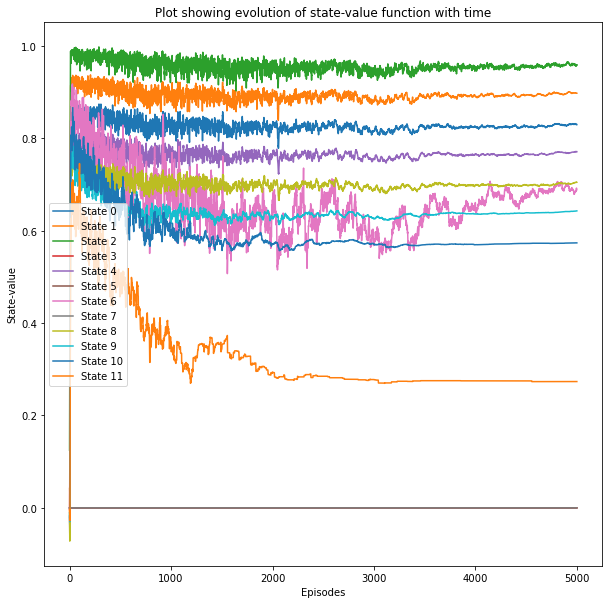

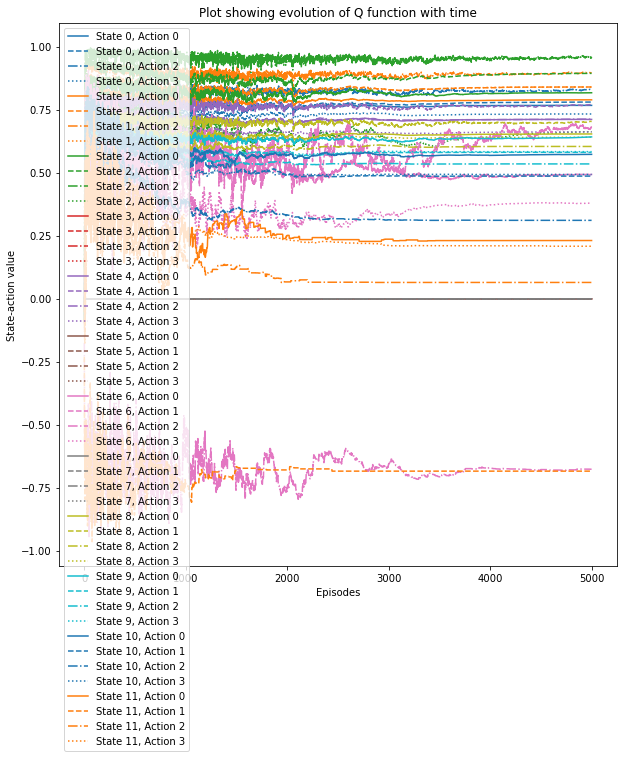

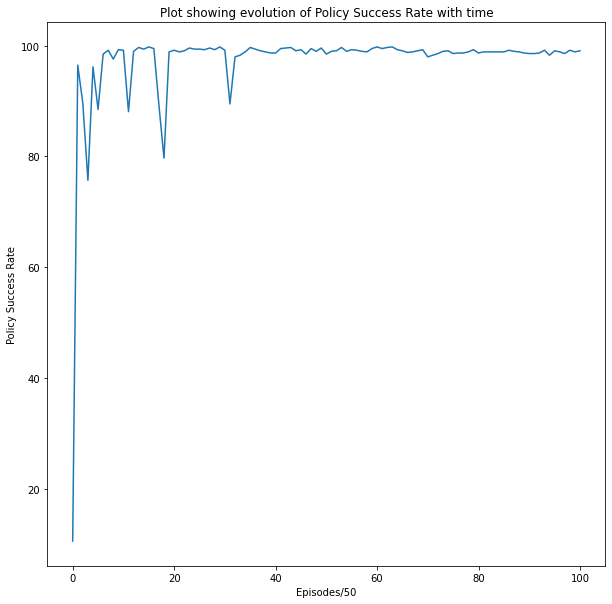

In [46]:
# Creating plots for Trajectory Learning
create_plots(trajectory_sampling, env, gamma_trajectory_sampling, alpha_trajectory_sampling, epsilon_trajectory_sampling, num_episodes, max_trajectory_trajectory_sampling)

<b>(a) & (b)</b> The plots of V-function vs Time (Episodes) and Q-function vs Time (Episodes) are above

<b>(c)</b> I averaged the results over 10 instances of the environment. The seed for each environment is from 0 to 9 (i.e. 0 for env1, 1 for env2, ..., 9 for env10)

<b>(d)</b>
Optimal Policy obtained using Trajectory Sampling algorithm \
<img src="image/optimal_policy_trajectory_sampling.png" style="height:500px">

<b>(e)</b> Final values of hyperparamenters: \
`gamma` = 0.99 \
`alpha` = 0.5 \
`epsilon` = 0.99 \
`max_trajectory` = 5 \
`max_steps` = 100 \
`num_episodes` = 5000
* Decayed `alpha` and `epsilon` exponentially to 0.01 (as exponential was giving better performance than linear)
* `gamma`, `max_trajectory` and Initial values of `alpha` and `epsilon` are taken to be such that the algorithm converges in minimum time to the real state values
* `max_steps` were taken to be such that almost all the trajectories are completed (i.e. all the trajectories given by the `generate_trajectory` function were reaching a terminal state)
* `num_episodes` is taken such that all the state values converge to their true values (I judged it from the plot. When the curves of all the state values were getting flat, I inferred that they have convereged)

<b>(f)</b> Observations from the plots:
* state2 is the most favourable state to be in, followed by state1, state0 and so on
* The plots has low variance and good amount of bias
* Compared to other algorithms, Trajectory Sampling converged to the optimal solution pretty quickly
* The final Policy Success Rate is almost 100% (~99%) and the plot is going up with time. This implies that our agent is learning (and our code is working fine) and it has almost reached a 100% accuracy

## Problem 12: Comparing Control Algorithms
(5+5+5+5+5+5=25 points)

For SARSA(λ) Replacing, SARSA(λ) Accumulating, Q(λ) Replacing, Q(λ) Accumulating, Dyna-Q, Trajectory Learning implemented above, do the following:

(a) For each of the algorithm, in a single plot, plot the evolution of Policy Success Rate (in %) vs Episodes.

(b) What are your observations from the Policy Success Rate (in %) plot.

(c) For each of the algorithm (in a single plot), plot the Estimated Expected Return (from the start state) vs Episodes.

(d) What are your observations for the Estimated Expected Return plot?

(e) For each of the algorithm (in a single plot), plot the State-value Function Estimation Error vs Episodes. State-value Function Estimation Error is defined as Mean Absolute Error across all V-function estimates (across all states) from the respective optimal value.

(f) What are your observations for the State-value Function Estimation Error plot?

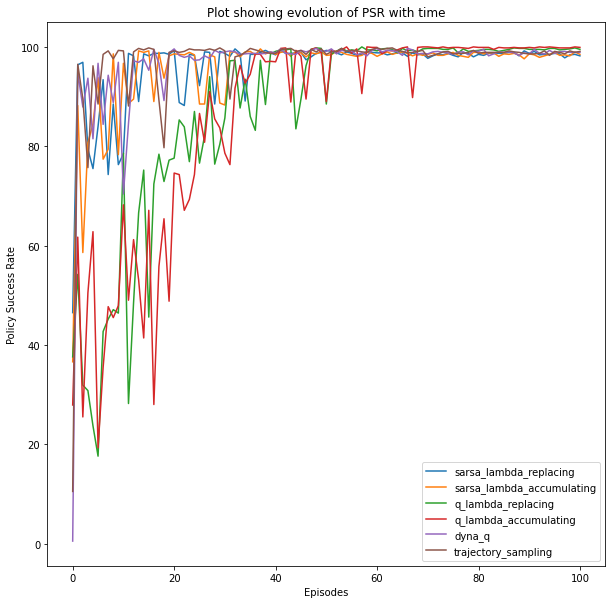

In [50]:
plot_policy_success_rate(['sarsa_lambda_replacing', 'sarsa_lambda_accumulating', 'q_lambda_replacing', 'q_lambda_accumulating', 'dyna_q', 'trajectory_sampling'])

<b>(a)</b> Plotted above \
<b>(b)</b>
* Q-lambda (Accumulating) is the slowest followed by Q-lambda (Replacing), SARSA-lambda (Replacing)
* SARSA-lambda, Dyna-Q and Trajectory Sampling have performed equall well
* All the algorithms have performed equally weel in terms of final accuracy